In [1]:
# # src/data_generator.py
# import numpy as np
# import pandas as pd

# def generate_cafe_data(n_days=365, seed=42):
#     np.random.seed(seed)
    
#     # Dates (365 jours 2024)
#     dates = pd.date_range(start="2024-01-01", periods=n_days)
    
#     # Ventes de base (saison + weekend boost)
#     base_sales = 100 + 20 * np.sin(np.linspace(0, 2 * np.pi, n_days))  # Saison
#     weekend_boost = np.where(dates.dayofweek >= 5, 15, 0)  # Samedi/dimanche
    
#     # Ajout de bruit
#     sales = base_sales + weekend_boost + np.random.normal(0, 5, n_days)
    
#     return pd.DataFrame({
#         "date": dates,
#         "ventes_total": np.round(sales, 2),
#         "nb_clients": np.random.poisson(15, n_days),
#         "est_weekend": dates.dayofweek >= 5
#     })

✅ Données sauvegardées dans data/generated/cafe_data_2024.csv
Shape : (365, 4)
        date  ventes_total  nb_clients  est_weekend
0 2024-01-01        102.48           8        False
1 2024-01-02         99.65          16        False
2 2024-01-03        103.93          14        False


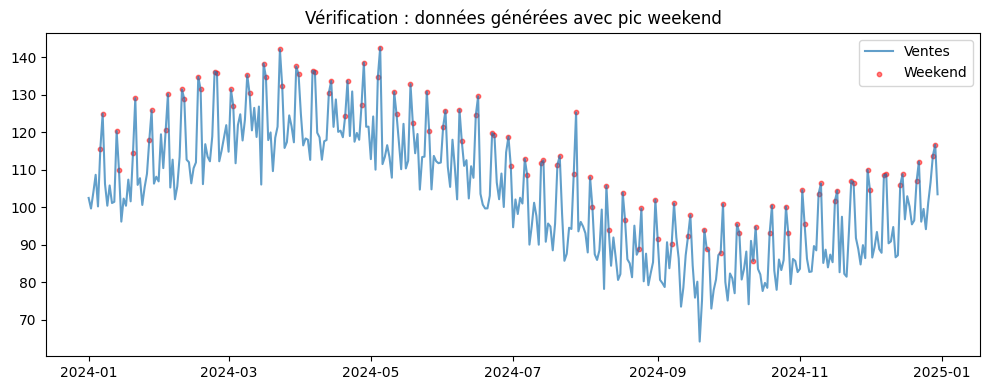

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Générer les données
np.random.seed(42)
dates = pd.date_range(start="2024-01-01", periods=365)

base_sales = 100 + 20 * np.sin(np.linspace(0, 2 * np.pi, 365))
weekend_boost = np.where(dates.dayofweek >= 5, 15, 0)
sales = base_sales + weekend_boost + np.random.normal(0, 5, 365)

df = pd.DataFrame({
    "date": dates,
    "ventes_total": np.round(sales, 2),
    "nb_clients": np.random.poisson(15, 365),
    "est_weekend": dates.dayofweek >= 5
})

# 2. Sauvegarder AU BON ENDROIT
df.to_csv("../data/generated/cafe_data_2024.csv", index=False)
print("✅ Données sauvegardées dans data/generated/cafe_data_2024.csv")
print(f"Shape : {df.shape}")
print(df.head(3))

# 3. Visualisation rapide de validation
plt.figure(figsize=(10, 4))
plt.plot(df['date'], df['ventes_total'], label='Ventes', alpha=0.7)
plt.scatter(df[df['est_weekend']]['date'], 
            df[df['est_weekend']]['ventes_total'], 
            color='red', s=10, label='Weekend', alpha=0.5)
plt.title("Vérification : données générées avec pic weekend")
plt.legend()
plt.tight_layout()
plt.show()